In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [119]:
from sklearn.datasets import load_digits 
digits= load_digits()

In [120]:
digits['data'][3]


array([ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
        4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
        2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
        0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
        5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.])

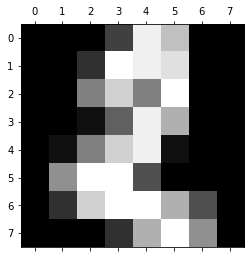

In [121]:
plt.matshow(digits['images'][2])

In [122]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(digits['data'],digits['target'],test_size=0.3)

In [123]:
len(x_train)   # JUST CHECKING THE NUMBER OF TRAINING DATA THAT WE HAVE

1257

In [124]:
len(x_test)

540

# NOW WE CREATE A LOGISTIC REGRESSION OBJECT

In [125]:
from sklearn.linear_model import LogisticRegression as LogR
mod=LogR()

# THIS IS THE TRAINING STEP

In [126]:
mod.fit(x_train,y_train)

C:\Users\91755\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\91755\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# PREDICTION AND ACCURACY OF OUR MODEL

In [127]:
mod.predict(digits['data'][2:8])  # HERE IT IS TAKING DATAS FROM Index 2 to Index 8(index 8 not included)
                                  # datas on index number 2 to 8 is predicted by this model, in this case

array([2, 3, 4, 5, 6, 7])

In [128]:
mod.predict([digits['data'][55]])    #IN THIS CASE, THE digits.data INDEX NUMBER 55, HAS 0 LOADED IN IT MAYBE, SO OUR MODEL PREDICTED IT AS 0.
                                    # THE PREDICITON MAY ALSO BE WRONG, AS OUR MODEL IS NOT 100% ACCURATE

array([0])

In [129]:
mod.predict(digits['data'])

array([0, 1, 2, ..., 8, 9, 8])

In [130]:
mod.score(x_test,y_test)    #ACCURACY TEST

0.9555555555555556

# AS OUR MODEL IN NOT 100% ACCURATE, MEANS IT WILL DO SOME ERRORS FOR SOME DATA
# WON'T IT BE NICE ,IF WE KNOW FOR WHICH PARTICULAR DATA  OUR MODEL IS DOING A MISTAKE IN PREDICITON
# SO,WE TRY TO FIND THAT OUT

In [131]:
y_pred= mod.predict(x_test)    #WE ARE LOADING THE WHOLE x_test data for prediction and storing it.


In [132]:
from sklearn.metrics import confusion_matrix as cm

In [133]:
cm_model=cm(y_test,y_pred)
cm_model

#WE MAKE A HEATMAP ,OF THIS ARRAY , SO THAT IT IS EASIER TO UNDERSTAND

array([[42,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 54,  0,  1,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 51,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 59,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 57,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 64,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 41,  0,  0],
       [ 0,  4,  1,  1,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 54]], dtype=int64)

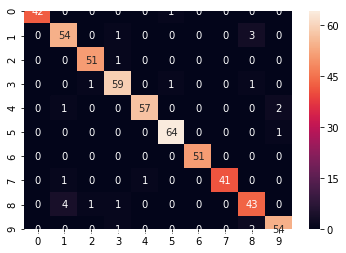

<Figure size 1440x648 with 0 Axes>

In [134]:
import seaborn as sns
sns.heatmap(cm_model,annot=True)
plt.figure(figsize=(20,9))
plt.show()

# HOW TO READ THIS HEAT MAP, AND KNOW WHERE OUR MODEL IS DOING MISTAKE

#####  THE VALUES ON THE Y AXIS IS THE TRUE VALUE
##### AND THE VALUES ON THE X AXIS IS THE PREDICTED VALUE
##### JUST SEE THE VALUE-2 JUST BELOW THE 47 , ON THE HEAT MAP.  THAT 2 ON THE HEATMAP CORRESPONDS TO
##### Y AXIS VALUE(TRUE VALUE) AS 2 AND X AXIS VALUE(PREDICTED VALUE ) AS 1.
##### SO THIS IS READ AS
##### THE TRUE VALUE WAS 2 BUT IT PREDICTED AS 1, AND THIS HAPPENED 2 TIMES

# LETS SEE SOME REAL IMAGES OF THE DIGITS THAT IS STORED AND PREDICT

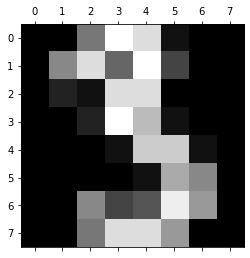

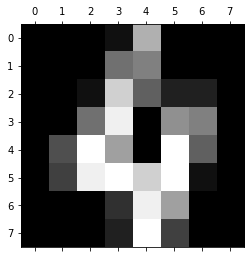

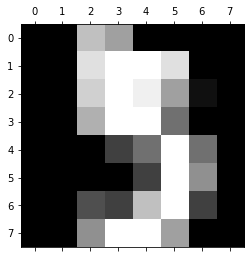

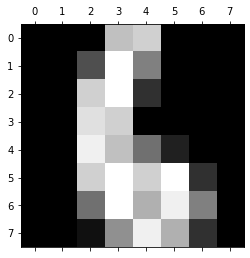

In [135]:

for i in range(3,7,1):
    plt.matshow(digits['images'][i])

# SEE, THESE IMAGES, AND LETS SEE, WHAT OUR MODEL PREDICTS FOR THIS IMAGES

In [136]:
mod.predict(digits['data'][3:7]) 

array([3, 4, 5, 6])

# SO,WE CAN SEE OUR MODEL IS PREDICTING IT AS 3,4,5,6 RESPECTIVELY.
# WHICH IS CORRECT ,MOST PROBABLY AS THE IMAGES LOOK LIKE THAT ONLY